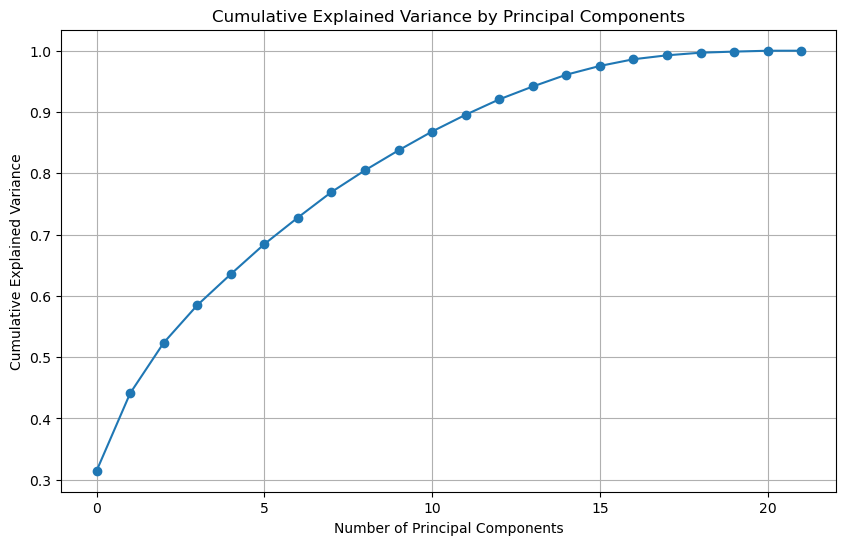

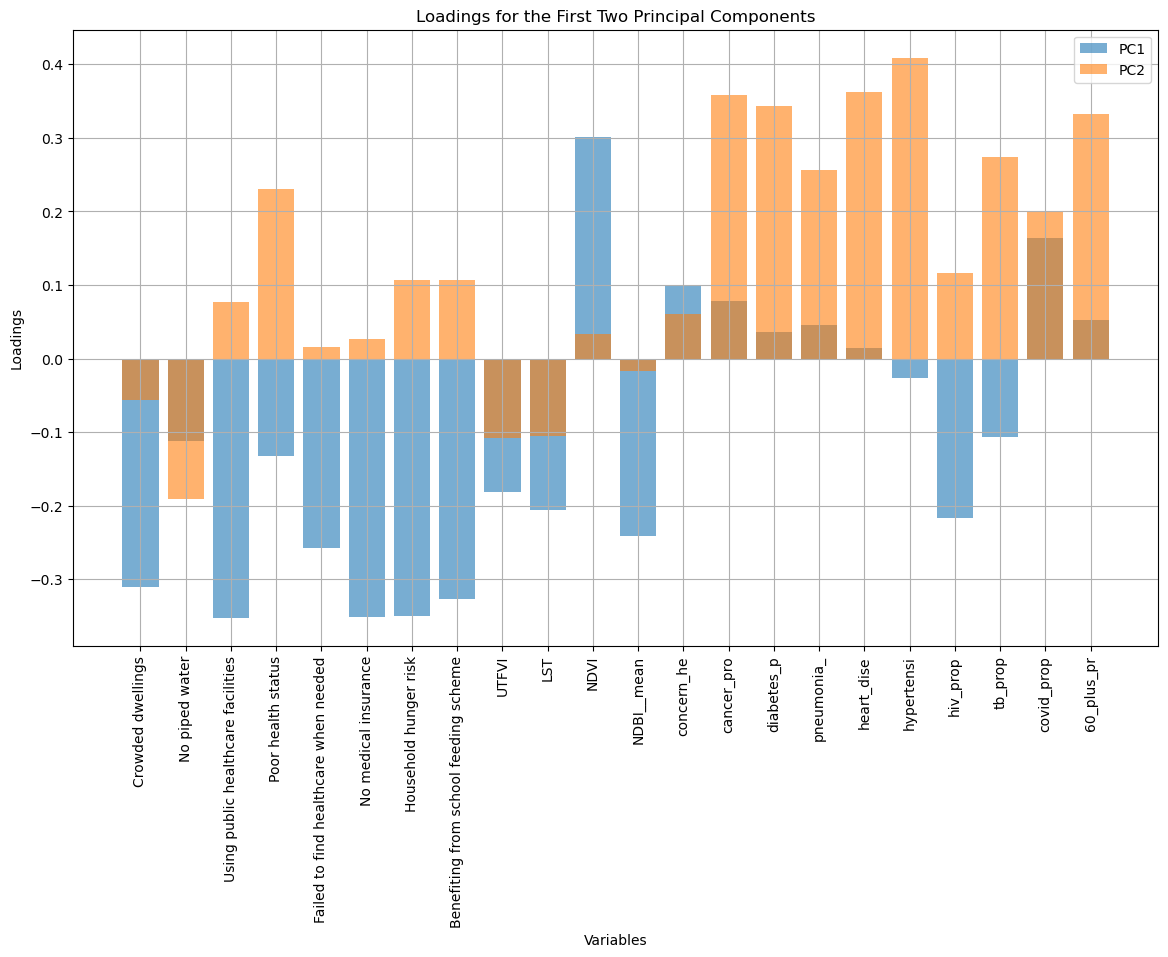

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
file_path = 'IBM_analysis_updated.csv'  # Replace with your actual file path
df = pd.read_csv(file_path)

# List of all variables to include in PCA with updated names
variables = [
    'Crowded dwellings', 'No piped water', 'Using public healthcare facilities', 'Poor health status', 
    'Failed to find healthcare when needed', 'No medical insurance', 'Household hunger risk', 
    'Benefiting from school feeding scheme', 'UTFVI', 'LST', 'NDVI', 'NDBI__mean', 'concern_he', 
    'cancer_pro', 'diabetes_p', 'pneumonia_', 'heart_dise', 'hypertensi', 'hiv_prop', 'tb_prop', 
    'covid_prop', '60_plus_pr'
]

# Filter the dataframe to include only the selected variables
df_selected = df[variables]

# Rescale the data using StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_selected)

# Perform PCA
pca = PCA(n_components=None)  # Retain all components
principal_components = pca.fit_transform(scaled_data)

# Get the explained variance ratio
explained_variance = pca.explained_variance_ratio_

# Get the loadings (coefficients of the original variables)
loadings = pca.components_
loadings_df = pd.DataFrame(loadings, columns=variables)

# Visualize the cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(explained_variance), marker='o')
plt.title('Cumulative Explained Variance by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

# Visualize the loadings for the first two principal components
plt.figure(figsize=(14, 8))
plt.bar(x=variables, height=loadings_df.iloc[0], label='PC1', alpha=0.6)
plt.bar(x=variables, height=loadings_df.iloc[1], label='PC2', alpha=0.6)
plt.xticks(rotation=90)
plt.title('Loadings for the First Two Principal Components')
plt.xlabel('Variables')
plt.ylabel('Loadings')
plt.legend()
plt.grid(True)
plt.show()

# Optional: Save the loadings to a CSV for further analysis
loadings_df.to_csv('PCA_Loadings.csv', index=False)


In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np

# Load the dataset
file_path = 'IBM_analysis_updated.csv'  # Replace with your actual file path
df = pd.read_csv(file_path)

# List of all variables to include in PCA with updated names
variables = [
    'Crowded dwellings', 'No piped water', 'Using public healthcare facilities', 'Poor health status', 
    'Failed to find healthcare when needed', 'No medical insurance', 'Household hunger risk', 
    'Benefiting from school feeding scheme', 'UTFVI', 'LST', 'NDVI', 'NDBI__mean', 'concern_he', 
    'cancer_pro', 'diabetes_p', 'pneumonia_', 'heart_dise', 'hypertensi', 'hiv_prop', 'tb_prop', 
    'covid_prop', '60_plus_pr'
]

# Filter the dataframe to include only the selected variables
df_selected = df[variables]

# Rescale the data using StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_selected)

# Perform PCA
pca = PCA(n_components=None)  # Retain all components
principal_components = pca.fit_transform(scaled_data)

# Option 1: Use the first principal component as the HVI
df['HVI_PC1'] = principal_components[:, 0]

# Option 2: Create a weighted combination of the first few principal components
# For example, using the first 3 components
weights = pca.explained_variance_ratio_[:3]
df['HVI_weighted'] = np.dot(principal_components[:, :3], weights)

# Optional: Standardize the HVI (rescale to 0-1)
df['HVI_PC1_standardized'] = (df['HVI_PC1'] - df['HVI_PC1'].min()) / (df['HVI_PC1'].max() - df['HVI_PC1'].min())
df['HVI_weighted_standardized'] = (df['HVI_weighted'] - df['HVI_weighted'].min()) / (df['HVI_weighted'].max() - df['HVI_weighted'].min())

# Save the results to a CSV file
df.to_csv('Ward_HVI.csv', index=False)

# Display the first few rows of the resulting dataframe
df[['HVI_PC1', 'HVI_weighted', 'HVI_PC1_standardized', 'HVI_weighted_standardized']].head()


,HVI_PC1,HVI_weighted,HVI_PC1_standardized,HVI_weighted_standardized
0,-1.067589,-0.062038,0.333000,0.439167
1,-2.569988,-0.761631,0.183269,0.248833
2,-3.174382,-0.889217,0.123035,0.214121
3,-1.646309,-0.480644,0.275324,0.325279
4,-1.198829,-0.403393,0.319920,0.346297


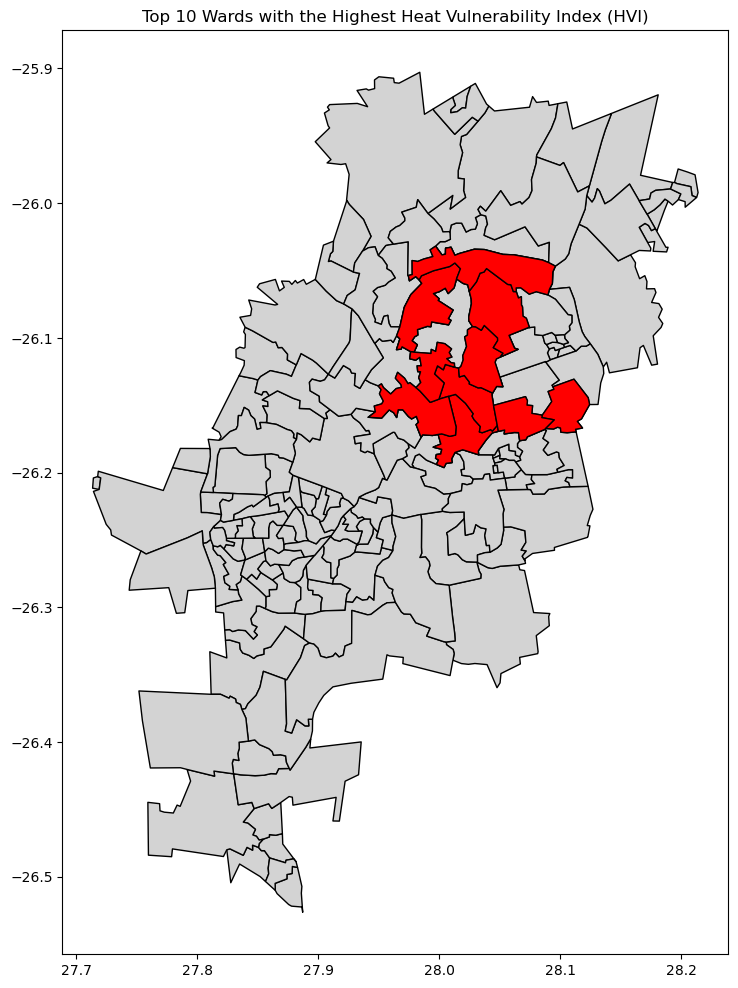

In [3]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the GeoJSON file directly using GeoPandas
file_path = 'HVI_with_columnames.geojson'

# Load the file with geopandas
gdf = gpd.read_file(file_path)

# Explode multi-part geometries into single-part geometries
gdf = gdf.explode(index_parts=False)

# Sort by the standardized HVI (using HVI_PC1_standardized in this example)
gdf_sorted = gdf.sort_values(by='Ward_HVI_1_HVI_PC1_standardized', ascending=False)

# Optionally, select top 10 wards with the highest HVI
top_wards = gdf_sorted.head(10)

# Plot the entire ward map
fig, ax = plt.subplots(figsize=(12, 12))
gdf.plot(ax=ax, color='lightgrey', edgecolor='black')

# Overlay the top wards with the highest HVI
top_wards.plot(ax=ax, color='red', edgecolor='black')

# Add a title and show the plot
plt.title('Top 10 Wards with the Highest Heat Vulnerability Index (HVI)')
plt.show()


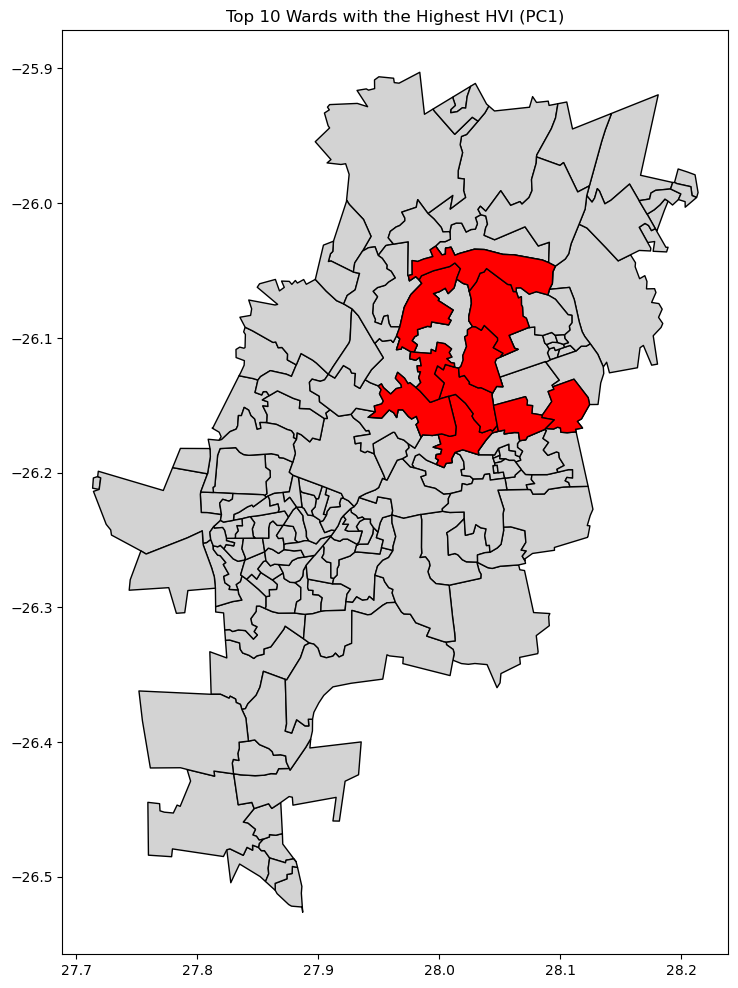

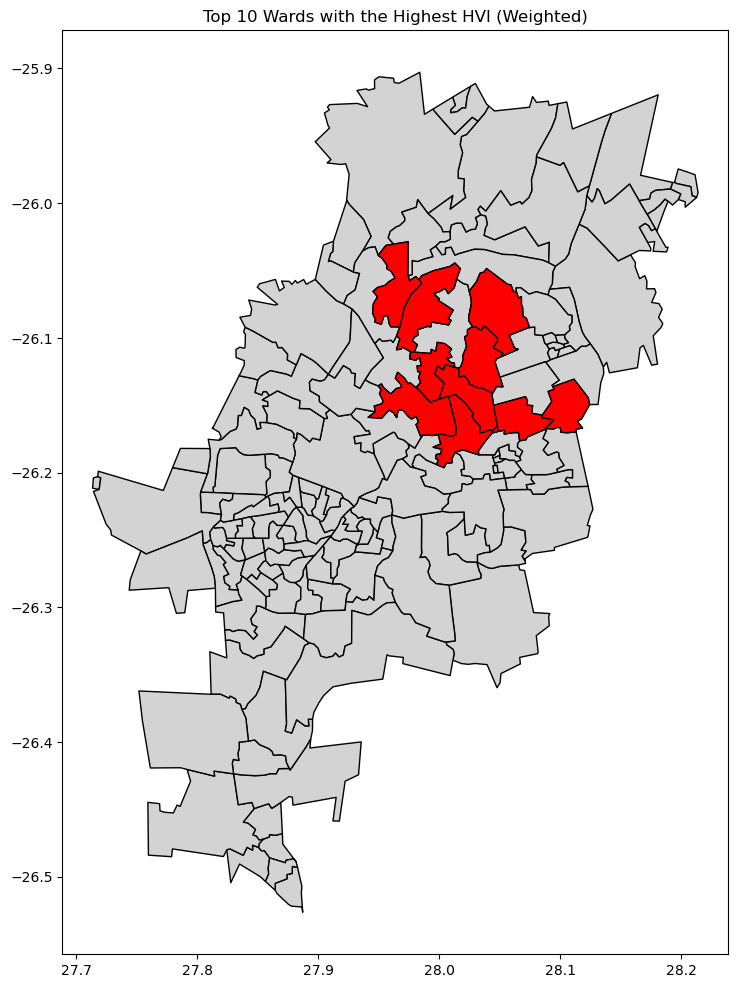

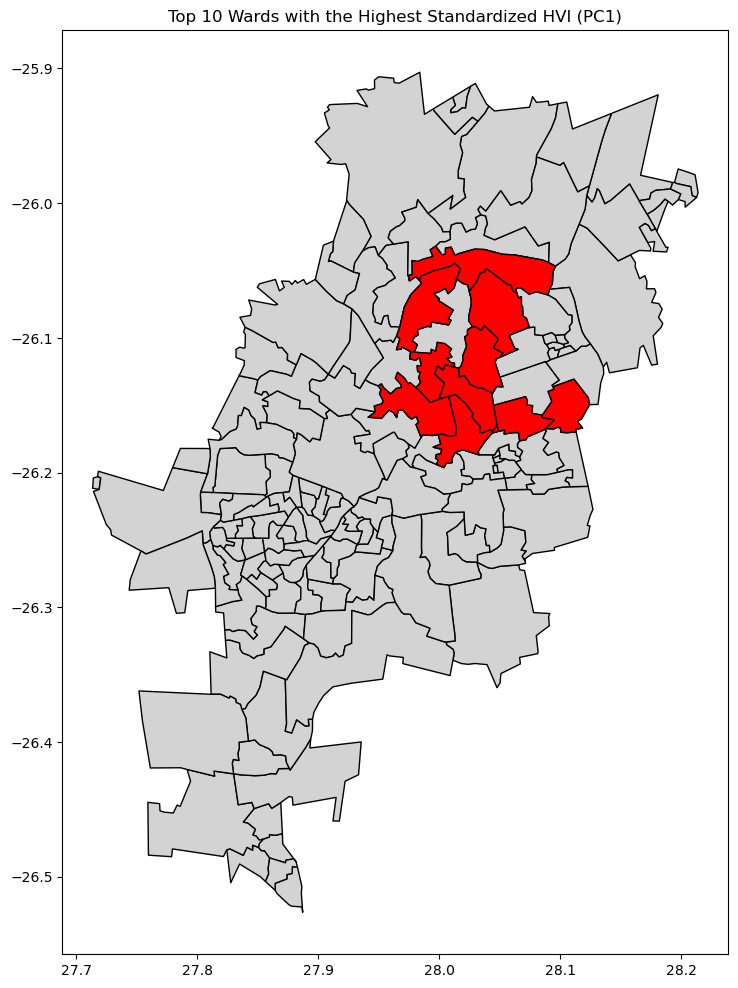

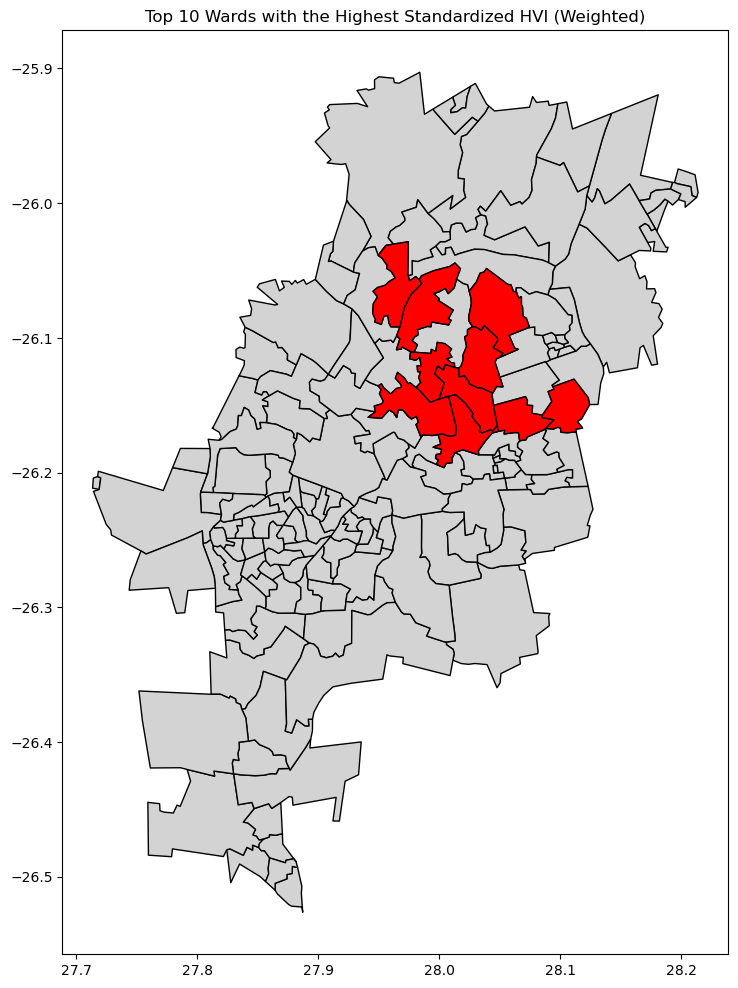

In [4]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the GeoJSON file directly using GeoPandas
file_path = 'HVI_with_columnames.geojson'
gdf = gpd.read_file(file_path)

# Explode multi-part geometries into single-part geometries
gdf = gdf.explode(index_parts=False)

# Define a function to plot the top 10 wards for a given column
def plot_top_10(column_name, title):
    gdf_sorted = gdf.sort_values(by=column_name, ascending=False)
    top_wards = gdf_sorted.head(10)
    
    fig, ax = plt.subplots(figsize=(12, 12))
    gdf.plot(ax=ax, color='lightgrey', edgecolor='black')
    top_wards.plot(ax=ax, color='red', edgecolor='black')
    plt.title(title)
    plt.show()

# Plot top 10 maps for each of the specified columns
plot_top_10('Ward_HVI_1_HVI_PC1', 'Top 10 Wards with the Highest HVI (PC1)')
plot_top_10('Ward_HVI_1_HVI_weighted', 'Top 10 Wards with the Highest HVI (Weighted)')
plot_top_10('Ward_HVI_1_HVI_PC1_standardized', 'Top 10 Wards with the Highest Standardized HVI (PC1)')
plot_top_10('Ward_HVI_1_HVI_weighted_standardized', 'Top 10 Wards with the Highest Standardized HVI (Weighted)')



            UTFVI         LST        NDVI  NDBI__mean  Crowded dwellings  \
count  135.000000  135.000000  135.000000  135.000000         135.000000   
mean    -0.060511   27.918638    0.136235    0.353667          15.188667   
std      0.038261    1.329895    0.038907    0.025202          11.970417   
min     -0.184367   23.993037    0.044773    0.287355           0.000000   
25%     -0.084278   27.090621    0.105111    0.336506           3.260000   
50%     -0.061369   27.931311    0.135406    0.356143          15.010000   
75%     -0.032726   28.864063    0.166227    0.370145          23.875000   
max      0.017178   30.661800    0.214655    0.419942          51.520000   

       No piped water  Using public healthcare facilities  Poor health status  \
count      135.000000                          135.000000           135.00000   
mean         5.449333                           61.922593             7.17763   
std          9.447985                           30.486634             4.

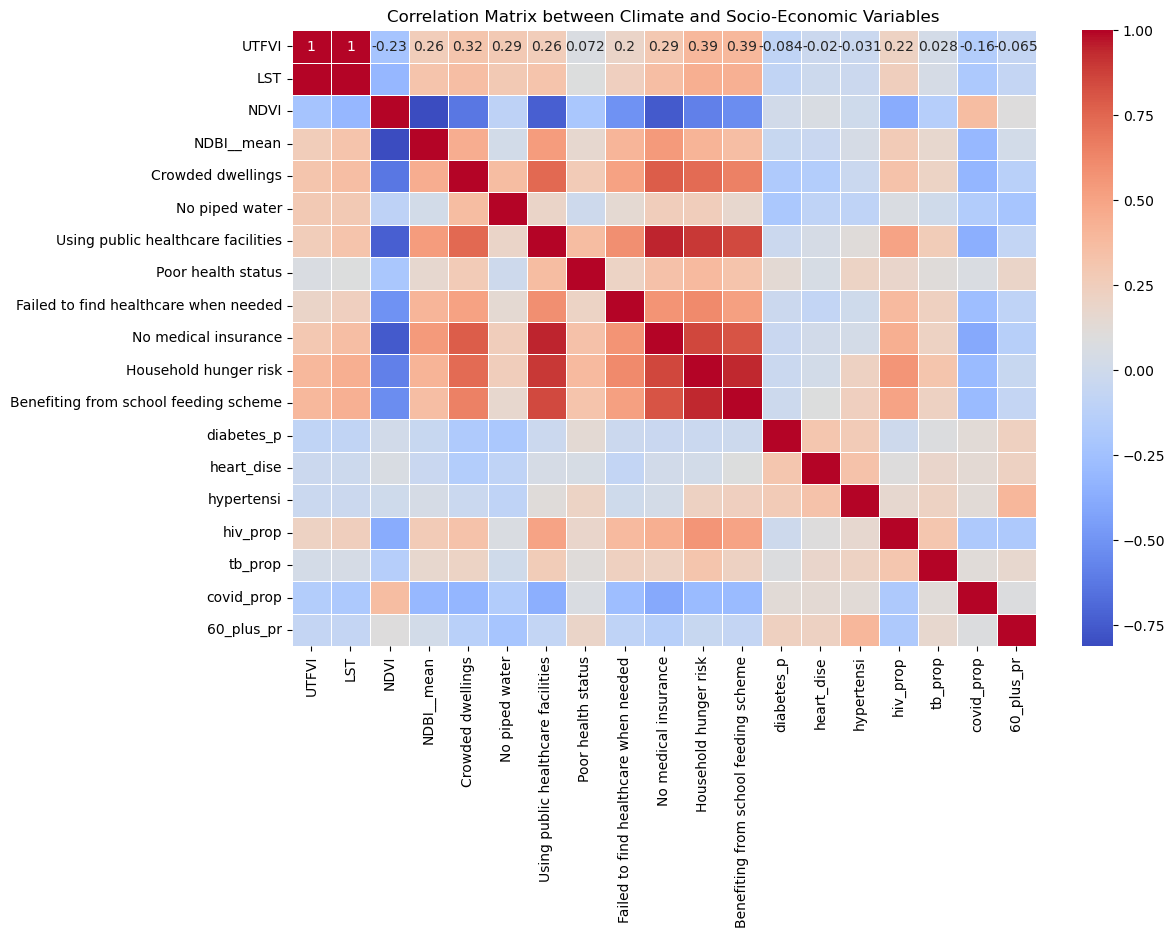

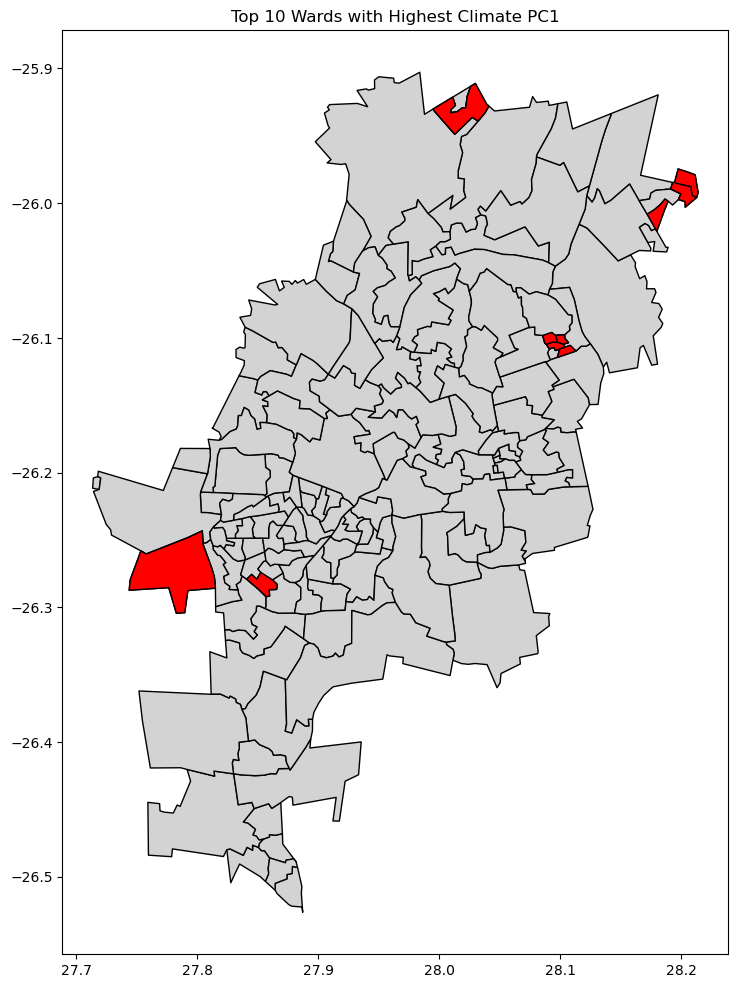

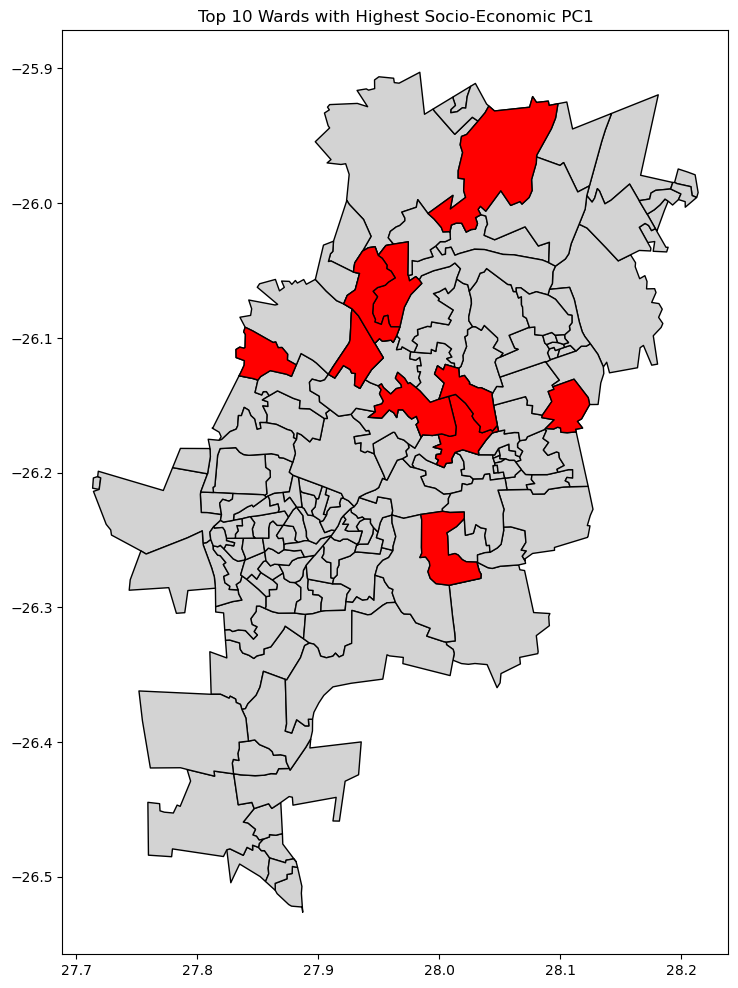

In [5]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns

# Load the GeoJSON file
file_path = 'HVI_with_columnames.geojson'
gdf = gpd.read_file(file_path)

# Explode multi-part geometries into single-part geometries
gdf = gdf.explode(index_parts=False)

# Define climate and socio-economic variables based on your description
climate_vars = ['UTFVI', 'LST', 'NDVI', 'NDBI__mean']
socio_econ_vars = [
    'Crowded dwellings', 'No piped water', 'Using public healthcare facilities', 
    'Poor health status', 'Failed to find healthcare when needed', 'No medical insurance', 
    'Household hunger risk', 'Benefiting from school feeding scheme', 'diabetes_p', 
    'heart_dise', 'hypertensi', 'hiv_prop', 'tb_prop', 'covid_prop', '60_plus_pr'
]

# Descriptive summary of the data
summary_table = gdf[climate_vars + socio_econ_vars].describe()

# Print the summary for review
print(summary_table)

# Save the descriptive statistics to a CSV file
summary_table.to_csv('Descriptive_Summary.csv', index=False)

# Rescale the data for PCA
scaler = StandardScaler()
scaled_data_climate = scaler.fit_transform(gdf[climate_vars])
scaled_data_socioecon = scaler.fit_transform(gdf[socio_econ_vars])

# Perform PCA on climate variables
pca_climate = PCA(n_components=None)
pca_climate_results = pca_climate.fit_transform(scaled_data_climate)

# Perform PCA on socio-economic variables
pca_socioecon = PCA(n_components=None)
pca_socioecon_results = pca_socioecon.fit_transform(scaled_data_socioecon)

# Combine PC1 from both climate and socio-economic PCA
gdf['Climate_PC1'] = pca_climate_results[:, 0]
gdf['SocioEcon_PC1'] = pca_socioecon_results[:, 0]

# Correlation matrix between all variables
corr_matrix = gdf[climate_vars + socio_econ_vars].corr()

# Plot the correlation matrix using seaborn
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix between Climate and Socio-Economic Variables')
plt.show()

# Save the correlation matrix as a CSV file
corr_matrix.to_csv('Correlation_Matrix.csv')

# Define a function to plot the top 10 wards for a given column
def plot_top_10(column_name, title):
    gdf_sorted = gdf.sort_values(by=column_name, ascending=False)
    top_wards = gdf_sorted.head(10)
    
    fig, ax = plt.subplots(figsize=(12, 12))
    gdf.plot(ax=ax, color='lightgrey', edgecolor='black')
    top_wards.plot(ax=ax, color='red', edgecolor='black')
    plt.title(title)
    plt.show()

# Plot top 10 maps for the two PCs
plot_top_10('Climate_PC1', 'Top 10 Wards with Highest Climate PC1')
plot_top_10('SocioEcon_PC1', 'Top 10 Wards with Highest Socio-Economic PC1')

# Save the geodataframe back to a file for further use
gdf.to_file('HVI_with_PCs.geojson', driver='GeoJSON')
gdf.to_csv('HVI_with_PCs.csv', index=False)


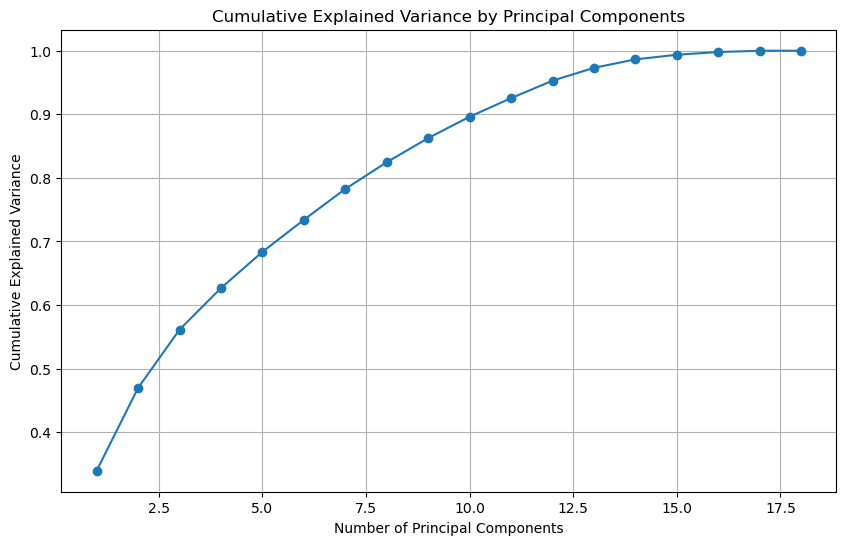

      UTFVI       LST      NDVI  NDBI__mean  Crowded dwellings  \
0 -0.197062 -0.222059  0.325604   -0.267906          -0.333249   
1 -0.182759 -0.173747 -0.006377    0.024536          -0.077864   
2 -0.623473 -0.592302 -0.191141    0.107430           0.085437   
3 -0.114438 -0.143201  0.312260   -0.455533           0.109189   
4 -0.026544 -0.038058  0.107798   -0.142723           0.212275   

   No piped water  Using public healthcare facilities  Poor health status  \
0       -0.126077                           -0.370280           -0.142453   
1       -0.254737                            0.092386            0.263464   
2       -0.180128                            0.131132           -0.002876   
3        0.383509                            0.048634            0.057177   
4        0.202643                            0.042656            0.602808   

   Failed to find healthcare when needed  No medical insurance  \
0                              -0.277278             -0.371264   
1       

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# List of variables to include in PCA (combine environmental and health metrics)
variables = [
    'UTFVI', 'LST', 'NDVI', 'NDBI__mean', 'Crowded dwellings', 
    'No piped water', 'Using public healthcare facilities', 'Poor health status',
    'Failed to find healthcare when needed', 'No medical insurance', 'Household hunger risk',
    'diabetes_p', 'heart_dise', 'hypertensi', 'hiv_prop', 'tb_prop', 'covid_prop', '60_plus_pr'
]

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(gdf[variables])

# Perform PCA
pca = PCA(n_components=None)  # Retain all components
principal_components = pca.fit_transform(scaled_data)

# Visualize explained variance
explained_variance = pca.explained_variance_ratio_
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance)+1), explained_variance.cumsum(), marker='o')
plt.title('Cumulative Explained Variance by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

# You can also inspect the loadings (coefficients) for each variable:
loadings = pd.DataFrame(pca.components_, columns=variables)
print(loadings.head())  # View the first few components


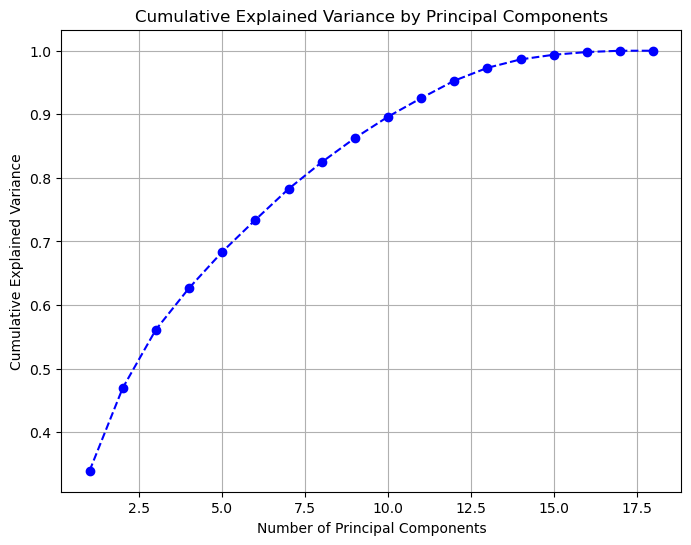

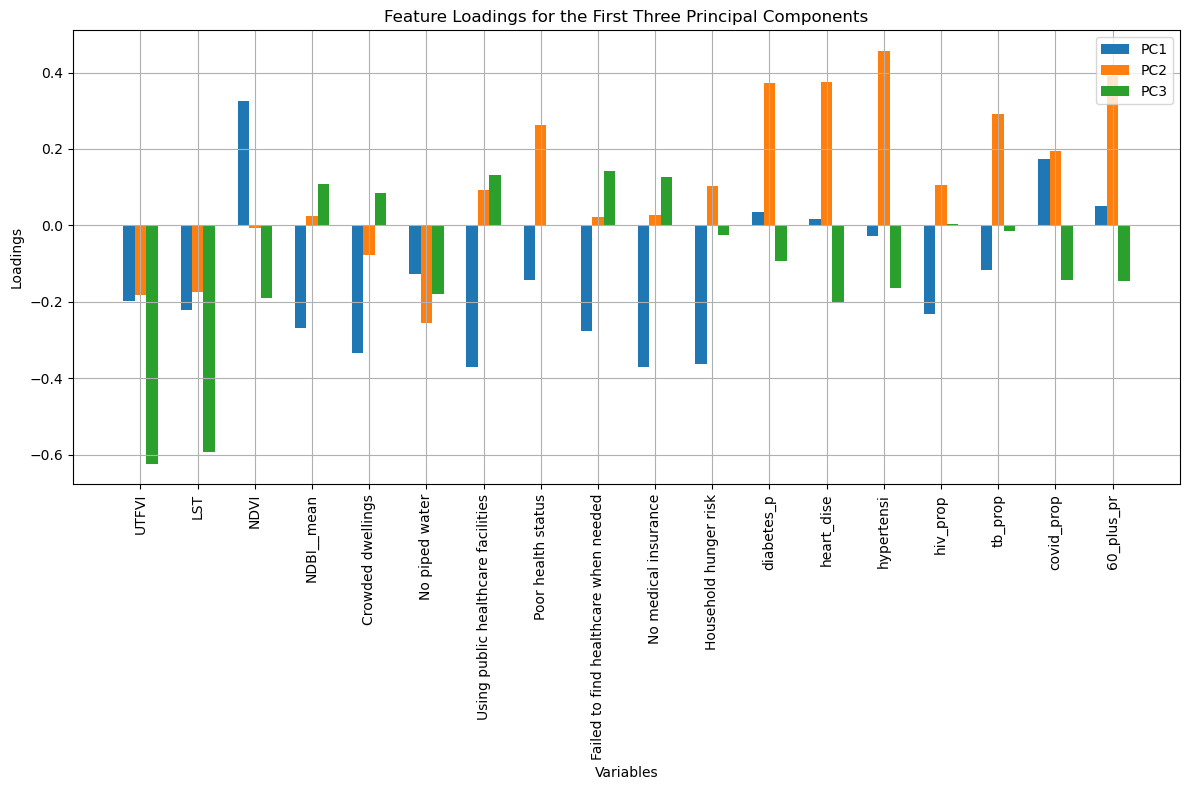

        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -0.962453  1.863577 -0.771796  0.025431 -1.813440  0.860048  0.201257   
1 -2.149750  0.493946 -0.743244  0.589180 -1.426128  0.347681  0.339646   
2 -3.040468  0.352809 -0.424749  0.607579 -1.819752  1.333125  0.871566   
3 -1.265755  0.142130 -0.205984  0.069555 -2.271132  0.735720  0.116346   
4 -0.692664  0.010293  0.019528  0.068900 -1.177161  0.755327  0.005678   

        PC8       PC9      PC10      PC11      PC12      PC13      PC14  \
0 -0.588755  1.721559 -0.533203  0.196668 -0.498810 -0.737778 -0.282830   
1  1.781732  1.064987  0.352955  2.136168  0.611801 -0.258890 -0.027415   
2  1.552170  0.383462 -0.173592  0.075091 -0.690910  0.954125  1.441550   
3  0.566064 -0.999406  0.426075  0.638041 -0.443351  0.002579  0.071102   
4  1.818750  1.131186 -0.078912 -0.719961 -0.829592  0.715699 -0.252397   

       PC15      PC16      PC17      PC18  
0  0.136378  0.383879  0.147072 -0.013116  
1  0.10783

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Define your socio-economic and environmental variables
variables = [
    'UTFVI', 'LST', 'NDVI', 'NDBI__mean', 'Crowded dwellings', 
    'No piped water', 'Using public healthcare facilities', 
    'Poor health status', 'Failed to find healthcare when needed', 
    'No medical insurance', 'Household hunger risk', 
    'diabetes_p', 'heart_dise', 'hypertensi', 'hiv_prop', 
    'tb_prop', 'covid_prop', '60_plus_pr'
]

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(gdf[variables])

# Perform PCA
pca = PCA(n_components=None)  # Retain all components
principal_components = pca.fit_transform(scaled_data)

# Cumulative explained variance for each principal component
explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot the cumulative explained variance
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance)+1), explained_variance, marker='o', linestyle='--', color='b')
plt.title('Cumulative Explained Variance by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

# Feature Loadings (importance of each variable in each component)
loadings = pd.DataFrame(pca.components_, columns=variables)

# Visualize the loadings of the first three principal components
fig, ax = plt.subplots(figsize=(12, 8))
components_to_plot = 3  # Number of components to plot
bar_width = 0.2
indices = np.arange(len(variables))

# Plot for each component
for i in range(components_to_plot):
    ax.bar(indices + i * bar_width, loadings.iloc[i], bar_width, label=f'PC{i+1}')

# Formatting the plot
ax.set_xlabel('Variables')
ax.set_ylabel('Loadings')
ax.set_title('Feature Loadings for the First Three Principal Components')
ax.set_xticks(indices + bar_width)
ax.set_xticklabels(variables, rotation=90)
ax.legend(loc='upper right')
ax.grid(True)
plt.tight_layout()
plt.show()

# Printing the first few rows of the principal components
pc_df = pd.DataFrame(principal_components, columns=[f'PC{i+1}' for i in range(principal_components.shape[1])])
print(pc_df.head())

# Get explained variance for the top components
for i, var in enumerate(pca.explained_variance_ratio_[:3]):
    print(f"Component {i+1} explains {var*100:.2f}% of the variance.")


In [8]:
import pandas as pd

# Create a DataFrame with the provided PCA component data
data = {
    'PC1': [-0.962453, -2.149750, -3.040468, -1.265755, -0.692664],
    'PC2': [1.863577, 0.493946, 0.352809, 0.142130, 0.010293],
    'PC3': [-0.771796, -0.743244, -0.424749, -0.205984, 0.019528],
    'PC4': [0.025431, 0.589180, 0.607579, 0.069555, 0.068900],
    'PC5': [-1.813440, -1.426128, -1.819752, -2.271132, -1.177161],
    'PC6': [0.860048, 0.347681, 1.333125, 0.735720, 0.755327],
    'PC7': [0.201257, 0.339646, 0.871566, 0.116346, 0.005678],
    'PC8': [-0.588755, 1.781732, 1.552170, 0.566064, 1.818750],
    'PC9': [1.721559, 1.064987, 0.383462, -0.999406, 1.131186],
    'PC10': [-0.533203, 0.352955, -0.173592, 0.426075, -0.078912],
    'PC11': [0.196668, 2.136168, 0.075091, 0.638041, -0.719961],
    'PC12': [-0.498810, 0.611801, -0.690910, -0.443351, -0.829592],
    'PC13': [-0.737778, -0.258890, 0.954125, 0.002579, 0.715699],
    'PC14': [-0.282830, -0.027415, 1.441550, 0.071102, -0.252397],
    'PC15': [0.136378, 0.107830, -0.908738, -0.342107, -0.409276],
    'PC16': [0.383879, 0.473810, -0.190200, -0.352164, -0.614343],
    'PC17': [0.147072, -0.087333, -0.136951, 0.709347, 0.208386],
    'PC18': [-0.013116, -0.012192, -0.013492, 0.018349, -0.011846],
}

# Variance explained by components
variance_explained = {
    'Component': ['PC1', 'PC2', 'PC3'],
    'Variance Explained (%)': [33.93, 13.02, 9.18]
}

# Convert variance data into DataFrame
df_variance = pd.DataFrame(variance_explained)

# Create the main PCA DataFrame
df_pca = pd.DataFrame(data)

# Save the PCA table and variance explained as an Excel file
with pd.ExcelWriter('Publishable_PCA_Table.xlsx') as writer:
    df_pca.to_excel(writer, sheet_name='PCA Components', index=False)
    df_variance.to_excel(writer, sheet_name='Variance Explained', index=False)

# Provide the download link to the user
"Publishable_PCA_Table.xlsx"


'Publishable_PCA_Table.xlsx'

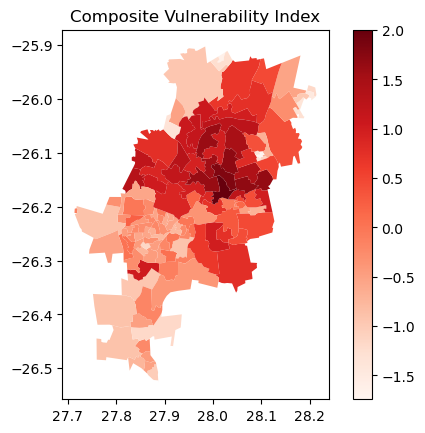

In [9]:
# Create a weighted composite vulnerability index using the first 3 components
weights = pca.explained_variance_ratio_[:3]
gdf['Composite_Vulnerability_Index'] = principal_components[:, :3] @ weights

# Visualize the spatial distribution of vulnerability
gdf.plot(column='Composite_Vulnerability_Index', cmap='Reds', legend=True)
plt.title('Composite Vulnerability Index')
plt.show()


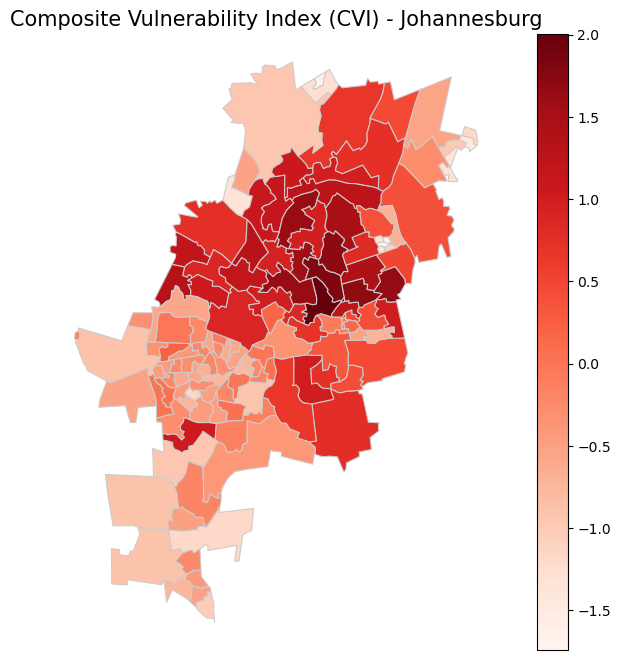

      WardID_       CVI       PC1       PC2       PC3
86   79800087  2.003909  5.391201  0.983293  0.510278
116  79800117  1.812542  4.888430  0.761276  0.598745
89   79800090  1.701109  4.825833 -0.638613  1.602593
73   79800073  1.686827  4.423265  0.457462  1.379804
72   79800072  1.665354  4.872173  0.585913 -0.696460
87   79800088  1.634705  4.825121 -0.259811  0.343844
103  79800104  1.609403  4.032607  2.361111 -0.721429
98   79800099  1.561386  4.133068  1.083318  0.197369
102  79800103  1.477733  4.407007 -0.669590  0.760653
74   79800074  1.404938  4.065582 -0.014550  0.300011


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

# Assuming 'principal_components' contains the PC values from the previous PCA analysis
# and 'gdf' is the GeoDataFrame with ward geometries and other variables

# Load principal components (PC1, PC2, PC3)
gdf['PC1'] = principal_components[:, 0]  # Component 1
gdf['PC2'] = principal_components[:, 1]  # Component 2
gdf['PC3'] = principal_components[:, 2]  # Component 3

# Step 2: Weight the components by their explained variance ratio
weights = pca.explained_variance_ratio_[:3]  # Using the first 3 components

# Calculate the weighted composite vulnerability index (CVI)
gdf['CVI'] = gdf['PC1'] * weights[0] + gdf['PC2'] * weights[1] + gdf['PC3'] * weights[2]

# Step 3: Visualize the Composite Vulnerability Index (CVI)
fig, ax = plt.subplots(1, 1, figsize=(10, 8))

# Plot the CVI on the map, with darker colors indicating higher vulnerability
gdf.plot(column='CVI', cmap='Reds', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Customize the plot
ax.set_title('Composite Vulnerability Index (CVI) - Johannesburg', fontsize=15)
ax.set_axis_off()
plt.show()

# Step 4: Inspect the top wards with the highest vulnerability scores
# Use 'WardID_' instead of 'WardID'
top_vulnerable_wards = gdf.nlargest(10, 'CVI')[['WardID_', 'CVI', 'PC1', 'PC2', 'PC3']]
print(top_vulnerable_wards)


C:\Users\CraigParker\AppData\Local\Temp\ipykernel_13372\671539524.py:34: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


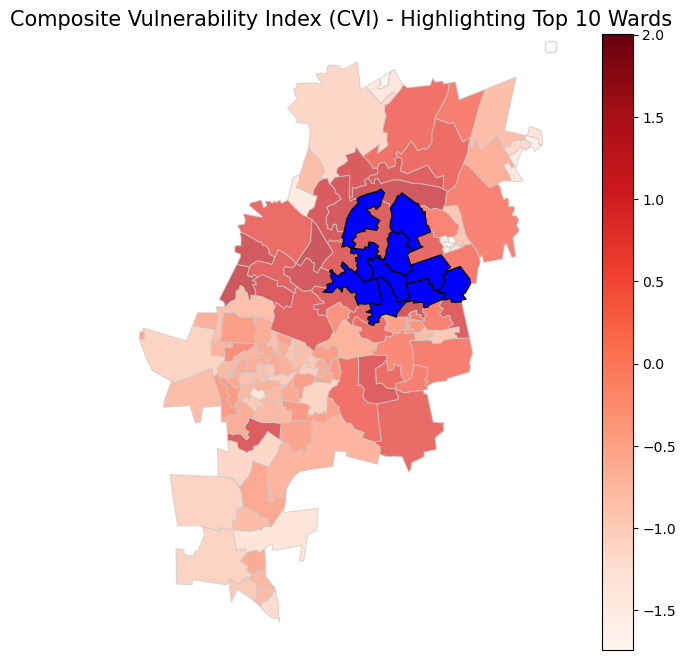

      WardID_       CVI       PC1       PC2       PC3
86   79800087  2.003909  5.391201  0.983293  0.510278
116  79800117  1.812542  4.888430  0.761276  0.598745
89   79800090  1.701109  4.825833 -0.638613  1.602593
73   79800073  1.686827  4.423265  0.457462  1.379804
72   79800072  1.665354  4.872173  0.585913 -0.696460
87   79800088  1.634705  4.825121 -0.259811  0.343844
103  79800104  1.609403  4.032607  2.361111 -0.721429
98   79800099  1.561386  4.133068  1.083318  0.197369
102  79800103  1.477733  4.407007 -0.669590  0.760653
74   79800074  1.404938  4.065582 -0.014550  0.300011


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

# Assuming 'principal_components' contains the PC values from the previous PCA analysis
# and 'gdf' is the GeoDataFrame with ward geometries and other variables

# Load principal components (PC1, PC2, PC3)
gdf['PC1'] = principal_components[:, 0]  # Component 1
gdf['PC2'] = principal_components[:, 1]  # Component 2
gdf['PC3'] = principal_components[:, 2]  # Component 3

# Step 2: Weight the components by their explained variance ratio
weights = pca.explained_variance_ratio_[:3]  # Using the first 3 components

# Calculate the weighted composite vulnerability index (CVI)
gdf['CVI'] = gdf['PC1'] * weights[0] + gdf['PC2'] * weights[1] + gdf['PC3'] * weights[2]

# Step 3: Identify the top 10 wards with the highest vulnerability
top_vulnerable_wards = gdf.nlargest(10, 'CVI')

# Step 4: Visualize the CVI and highlight the top 10 wards
fig, ax = plt.subplots(1, 1, figsize=(10, 8))

# Plot the rest of the wards with a base color
gdf.plot(column='CVI', cmap='Reds', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True, alpha=0.7)

# Highlight the top 10 wards with a different color (e.g., blue)
top_vulnerable_wards.plot(ax=ax, color='blue', edgecolor='black', linewidth=1, label="Top 10 Vulnerable Wards")

# Customize the plot
ax.set_title('Composite Vulnerability Index (CVI) - Highlighting Top 10 Wards', fontsize=15)
ax.set_axis_off()
plt.legend()

# Display the map
plt.show()

# Display the top 10 vulnerable wards
print(top_vulnerable_wards[['WardID_', 'CVI', 'PC1', 'PC2', 'PC3']])


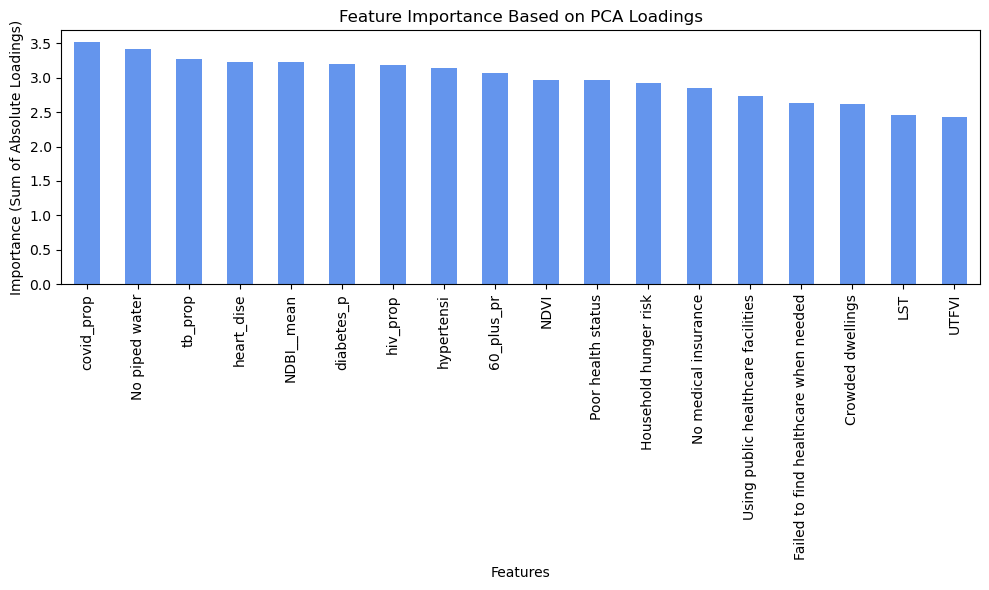

Top features contributing to heat vulnerability:
covid_prop        3.512435
No piped water    3.421469
tb_prop           3.267883
heart_dise        3.222479
NDBI__mean        3.221211
diabetes_p        3.205735
hiv_prop          3.180099
hypertensi        3.146039
60_plus_pr        3.064702
NDVI              2.971372
dtype: float64


In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'loadings' DataFrame contains the PCA loadings (components_ from PCA)
# Index of loadings corresponds to each PC, and columns are variables

# Calculate absolute loadings (importance) for the first three principal components
feature_importance = loadings.abs().sum(axis=0)

# Sort feature importance in descending order
sorted_importance = feature_importance.sort_values(ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 6))
sorted_importance.plot(kind='bar', color='cornflowerblue')
plt.title('Feature Importance Based on PCA Loadings')
plt.xlabel('Features')
plt.ylabel('Importance (Sum of Absolute Loadings)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Print the top features
print("Top features contributing to heat vulnerability:")
print(sorted_importance.head(10))


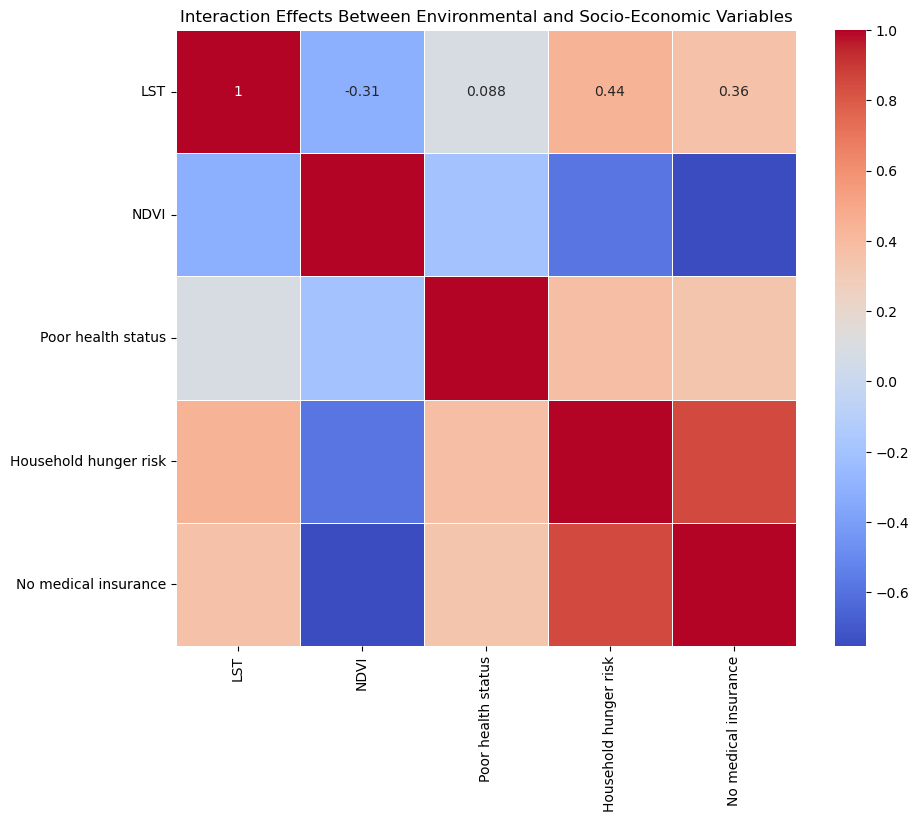

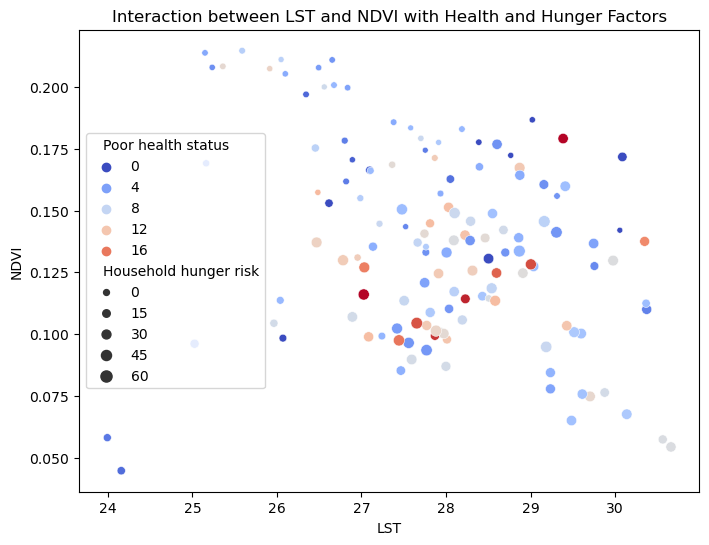

In [13]:
import seaborn as sns
import numpy as np

# Select key environmental and socio-economic variables for interaction analysis
interaction_data = gdf[['LST', 'NDVI', 'Poor health status', 'Household hunger risk', 'No medical insurance']]

# Calculate the correlation matrix
correlation_matrix = interaction_data.corr()

# Visualize the interaction effects using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Interaction Effects Between Environmental and Socio-Economic Variables')
plt.show()

# Scatter plot: Interaction between LST and NDVI
plt.figure(figsize=(8, 6))
sns.scatterplot(x='LST', y='NDVI', data=interaction_data, hue='Poor health status', size='Household hunger risk', palette='coolwarm')
plt.title('Interaction between LST and NDVI with Health and Hunger Factors')
plt.show()


Moran's I for LST: 0.7075364992059748, p-value: 0.001
Moran's I for CVI: 0.6331725909718541, p-value: 0.001


c:\Users\craigparker\Anaconda3\Lib\site-packages\spaghetti\network.py:41: FutureWarning: The next major release of pysal/spaghetti (2.0.0) will drop support for all ``libpysal.cg`` geometries. This change is a first step in refactoring ``spaghetti`` that is expected to result in dramatically reduced runtimes for network instantiation and operations. Users currently requiring network and point pattern input as ``libpysal.cg`` geometries should prepare for this simply by converting to ``shapely`` geometries.
  warnings.warn(dep_msg, FutureWarning, stacklevel=1)


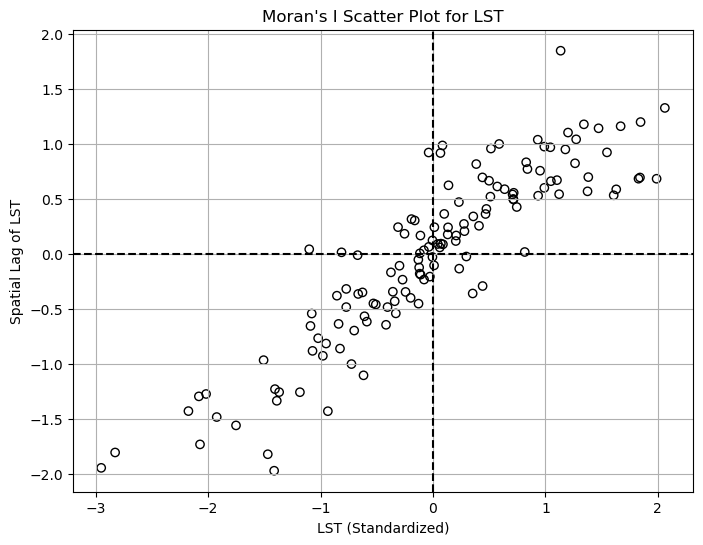

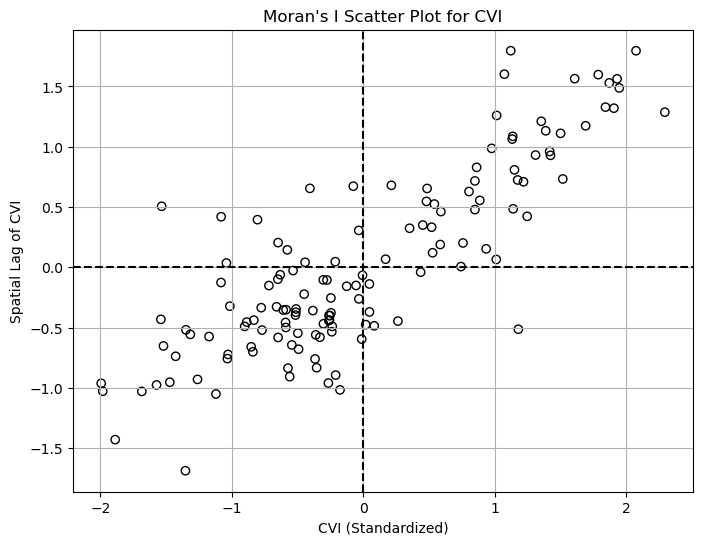

In [14]:
import pysal.lib as ps
from pysal.explore import esda
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'gdf' has LST and socio-economic variables as columns

# Step 1: Create spatial weights (based on contiguity)
weights = ps.weights.contiguity.Queen.from_dataframe(gdf, use_index=True)

# Step 2: Perform Moran's I test for LST
moran_lst = esda.Moran(gdf['LST'], weights)

# Step 3: Perform Moran's I test for the Composite Vulnerability Index (CVI)
moran_cvi = esda.Moran(gdf['CVI'], weights)

# Step 4: Print Moran's I results
print(f"Moran's I for LST: {moran_lst.I}, p-value: {moran_lst.p_sim}")
print(f"Moran's I for CVI: {moran_cvi.I}, p-value: {moran_cvi.p_sim}")

# Step 5: Manual Moran's I plot for LST
z_lst = (gdf['LST'] - gdf['LST'].mean()) / gdf['LST'].std()  # Standardize LST
lag_z_lst = weights.sparse * z_lst  # Spatial lag

plt.figure(figsize=(8, 6))
plt.scatter(z_lst, lag_z_lst, edgecolor='k', facecolor='none')
plt.axhline(0, color='k', linestyle='--')
plt.axvline(0, color='k', linestyle='--')
plt.title('Moran\'s I Scatter Plot for LST')
plt.xlabel('LST (Standardized)')
plt.ylabel('Spatial Lag of LST')
plt.grid(True)
plt.show()

# Step 6: Manual Moran's I plot for CVI
z_cvi = (gdf['CVI'] - gdf['CVI'].mean()) / gdf['CVI'].std()  # Standardize CVI
lag_z_cvi = weights.sparse * z_cvi  # Spatial lag

plt.figure(figsize=(8, 6))
plt.scatter(z_cvi, lag_z_cvi, edgecolor='k', facecolor='none')
plt.axhline(0, color='k', linestyle='--')
plt.axvline(0, color='k', linestyle='--')
plt.title('Moran\'s I Scatter Plot for CVI')
plt.xlabel('CVI (Standardized)')
plt.ylabel('Spatial Lag of CVI')
plt.grid(True)
plt.show()


Moran's I for LST: 0.7075364992059748, p-value: 0.001
Moran's I for CVI: 0.6233682628056773, p-value: 0.001


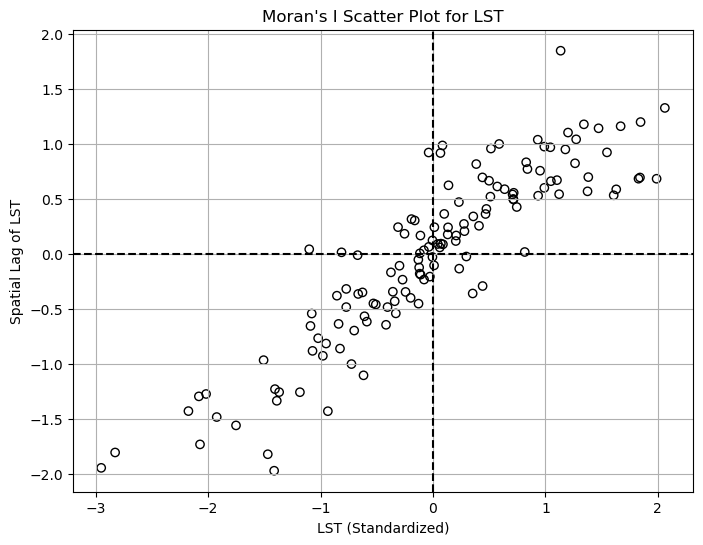

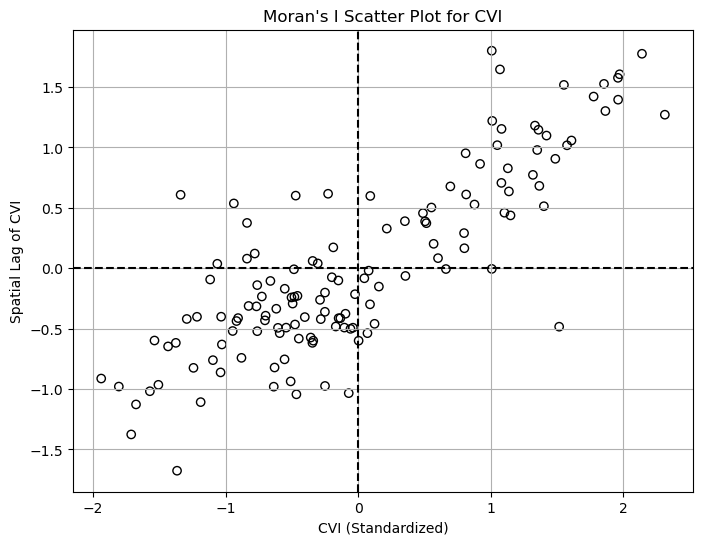

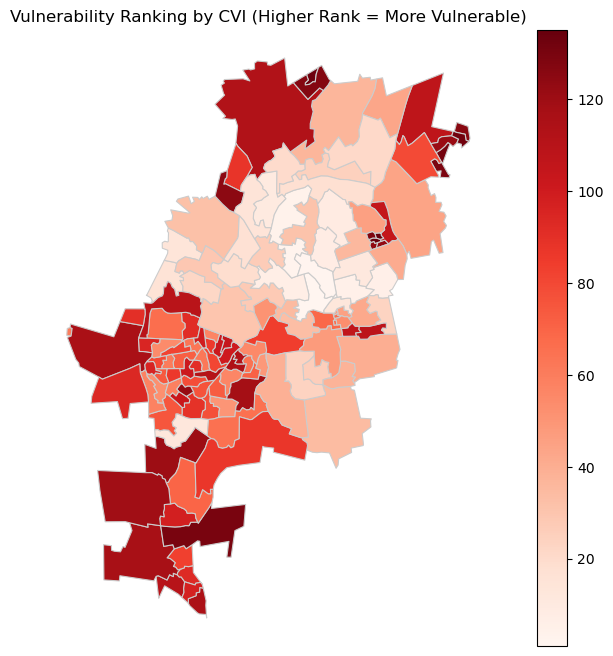

C:\Users\CraigParker\AppData\Local\Temp\ipykernel_13372\2481637089.py:77: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


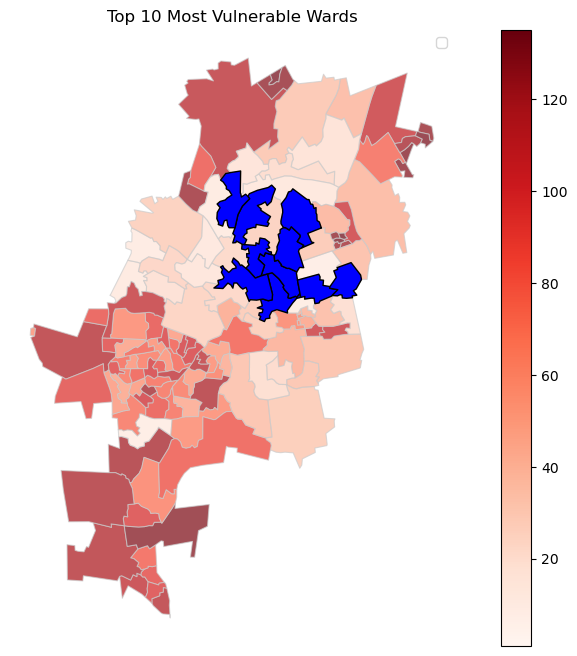

      WardID_       CVI  Vulnerability_Rank
86   79800087  1.000000                 1.0
116  79800117  0.959430                 2.0
98   79800099  0.919738                 3.0
103  79800104  0.917113                 4.0
73   79800073  0.916803                 5.0
72   79800072  0.894520                 6.0
87   79800088  0.892062                 7.0
89   79800090  0.873665                 8.0
102  79800103  0.834353                 9.0
100  79800101  0.826466                10.0


In [17]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import pysal.lib as ps
from pysal.explore import esda

# Load the GeoJSON file
file_path = 'HVI_included.geojson'  # Replace with your actual file path
gdf = gpd.read_file(file_path)

# Explode multi-part geometries into single-part geometries if needed
gdf = gdf.explode(index_parts=False)

# Step 1: Ensure that LST and CVI are in the GeoDataFrame
gdf['LST'] = gdf['LST'].astype(float)  # Convert to float if necessary
gdf['CVI'] = gdf['Ward_HVI_1_HVI_weighted_standardized'].astype(float)  # Use CVI from weighted standardized column

# Step 2: Create spatial weights (based on contiguity)
weights = ps.weights.contiguity.Queen.from_dataframe(gdf, use_index=True)

# Step 3: Perform Moran's I test for LST
moran_lst = esda.Moran(gdf['LST'], weights)

# Step 4: Perform Moran's I test for CVI
moran_cvi = esda.Moran(gdf['CVI'], weights)

# Step 5: Print Moran's I results
print(f"Moran's I for LST: {moran_lst.I}, p-value: {moran_lst.p_sim}")
print(f"Moran's I for CVI: {moran_cvi.I}, p-value: {moran_cvi.p_sim}")

# Step 6: Create Moran's I scatter plot for LST
z_lst = (gdf['LST'] - gdf['LST'].mean()) / gdf['LST'].std()  # Standardize LST
lag_z_lst = weights.sparse * z_lst  # Spatial lag

plt.figure(figsize=(8, 6))
plt.scatter(z_lst, lag_z_lst, edgecolor='k', facecolor='none')
plt.axhline(0, color='k', linestyle='--')
plt.axvline(0, color='k', linestyle='--')
plt.title('Moran\'s I Scatter Plot for LST')
plt.xlabel('LST (Standardized)')
plt.ylabel('Spatial Lag of LST')
plt.grid(True)
plt.show()

# Step 7: Create Moran's I scatter plot for CVI
z_cvi = (gdf['CVI'] - gdf['CVI'].mean()) / gdf['CVI'].std()  # Standardize CVI
lag_z_cvi = weights.sparse * z_cvi  # Spatial lag

plt.figure(figsize=(8, 6))
plt.scatter(z_cvi, lag_z_cvi, edgecolor='k', facecolor='none')
plt.axhline(0, color='k', linestyle='--')
plt.axvline(0, color='k', linestyle='--')
plt.title('Moran\'s I Scatter Plot for CVI')
plt.xlabel('CVI (Standardized)')
plt.ylabel('Spatial Lag of CVI')
plt.grid(True)
plt.show()

# Step 8: Rank wards by CVI
gdf['Vulnerability_Rank'] = gdf['CVI'].rank(ascending=False)

# Step 9: Plot the vulnerability ranking (higher rank = higher vulnerability)
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
gdf.plot(column='Vulnerability_Rank', cmap='Reds', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
plt.title('Vulnerability Ranking by CVI (Higher Rank = More Vulnerable)')
ax.set_axis_off()
plt.show()

# Step 10: Highlight top 10 most vulnerable wards
top_10_wards = gdf.nsmallest(10, 'Vulnerability_Rank')

fig, ax = plt.subplots(1, 1, figsize=(12, 8))
gdf.plot(column='Vulnerability_Rank', cmap='Reds', linewidth=0.8, ax=ax, edgecolor='0.8', alpha=0.7, legend=True)
top_10_wards.plot(ax=ax, color='blue', edgecolor='black', label='Top 10 Vulnerable Wards')
plt.title('Top 10 Most Vulnerable Wards')
ax.set_axis_off()
plt.legend()
plt.show()

# Print the top 10 vulnerable wards and their CVI scores
print(top_10_wards[['WardID_', 'CVI', 'Vulnerability_Rank']])


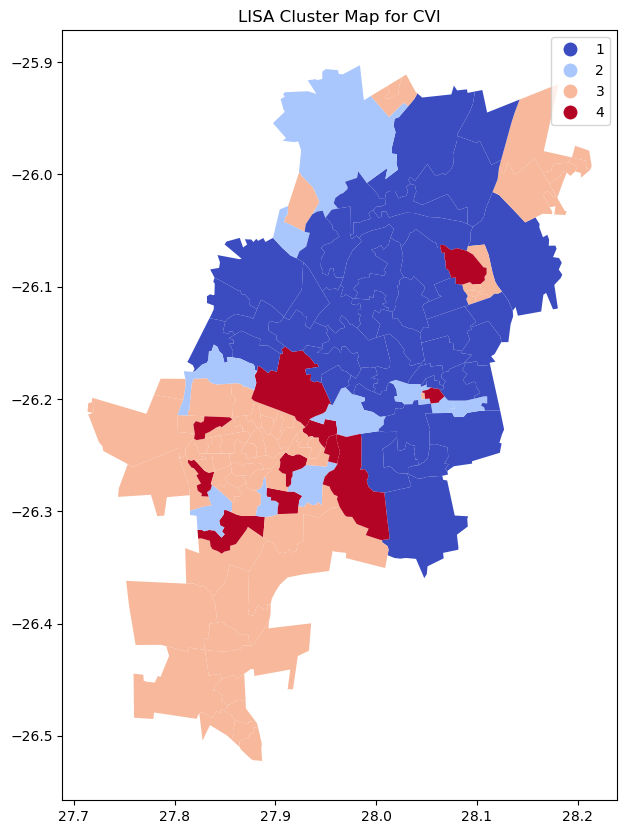

In [18]:
import pysal.lib as ps
from pysal.explore import esda
import geopandas as gpd
import matplotlib.pyplot as plt

# Assuming 'gdf' has LST and socio-economic variables as columns

# Step 1: Create spatial weights (based on contiguity)
weights = ps.weights.contiguity.Queen.from_dataframe(gdf, use_index=True)

# Step 2: Perform Moran's I test for CVI
moran_cvi = esda.Moran(gdf['CVI'], weights)

# Step 3: Local Moran's I for clusters
lisa = esda.Moran_Local(gdf['CVI'], weights)

# Step 4: Plot the spatial clusters
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
gdf.assign(Is_Cluster=lisa.q).plot(column='Is_Cluster', categorical=True, k=4, cmap='coolwarm', legend=True, ax=ax)
plt.title('LISA Cluster Map for CVI')
plt.show()
